In [ ]:
import pprint
import json

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [ ]:
keras.__version__

'3.4.1'

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Axes: >

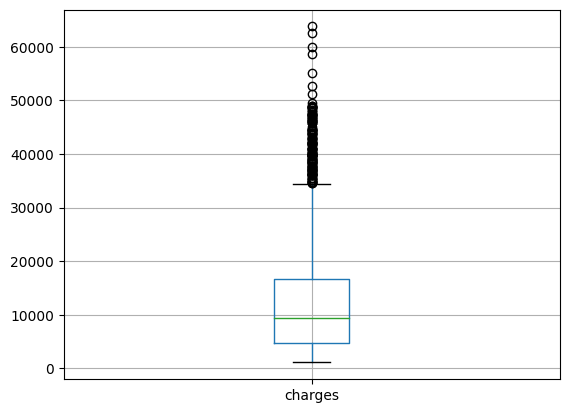

In [ ]:
df.boxplot('charges')

<Axes: ylabel='Density'>

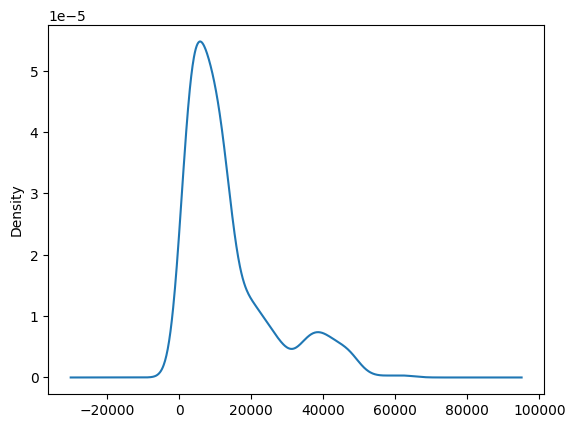

In [ ]:
df['charges'].plot.kde()

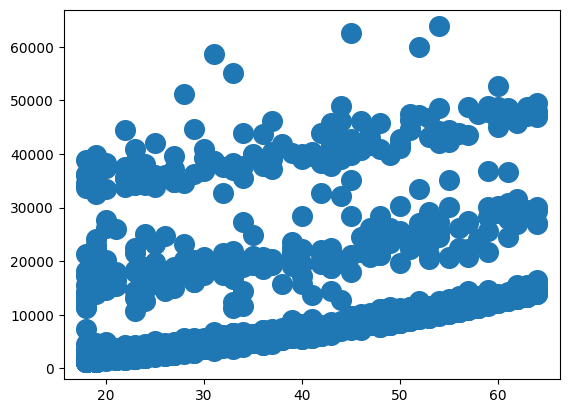

In [ ]:
plt.scatter(df['age'], df['charges'], s=200)

In [ ]:
features = df.drop('charges', axis=1)

In [ ]:
label = df[['charges']]

In [ ]:
cat_feat = features[['sex', 'smoker', 'region']].copy()

In [ ]:
num_feat = features.drop(['sex', 'smoker', 'region'], axis=1)

In [ ]:
gender_dict = {'female':0, 'male': 1}
cat_feat['sex'].replace(gender_dict, inplace=True)

In [ ]:
smoker_dict = {'no':0, 'yes': 1}
cat_feat['smoker'].replace(smoker_dict, inplace=True)

In [ ]:
cat_feat = pd.get_dummies(cat_feat, columns=['region'])

In [ ]:
cat_feat.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,False,False,False,True
1,1,0,False,False,True,False
2,1,0,False,False,True,False
3,1,0,False,True,False,False
4,1,0,False,True,False,False


In [ ]:
standardScaler = StandardScaler()
num_feat = pd.DataFrame(standardScaler.fit_transform(num_feat), columns = num_feat.columns, index=num_feat.index)

In [ ]:
num_feat.describe()

,age,bmi,children
count,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.805565e-16,-2.124194e-16,-5.576008e-17
std,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02
75%,8.396738e-01,6.611572e-01,7.510793e-01
max,1.765289e+00,3.685522e+00,3.240619e+00


In [ ]:
feat = pd.concat([cat_feat, num_feat], axis=1)

In [ ]:
feat.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,0,1,False,False,False,True,-1.438764,-0.453320,-0.908614
1,1,0,False,False,True,False,-1.509965,0.509621,-0.078767
2,1,0,False,False,True,False,-0.797954,0.383307,1.580926
3,1,0,False,True,False,False,-0.441948,-1.305531,-0.908614
4,1,0,False,True,False,False,-0.513149,-0.292556,-0.908614


In [ ]:
data = pd.concat([feat,label], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feat, label, test_size=0.2, random_state=1)

In [ ]:
x_train.keys()

Index(['sex', 'smoker', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'age', 'bmi', 'children'],
      dtype='object')

In [ ]:
model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
optimier = keras.optimizers.Adam(0.001)

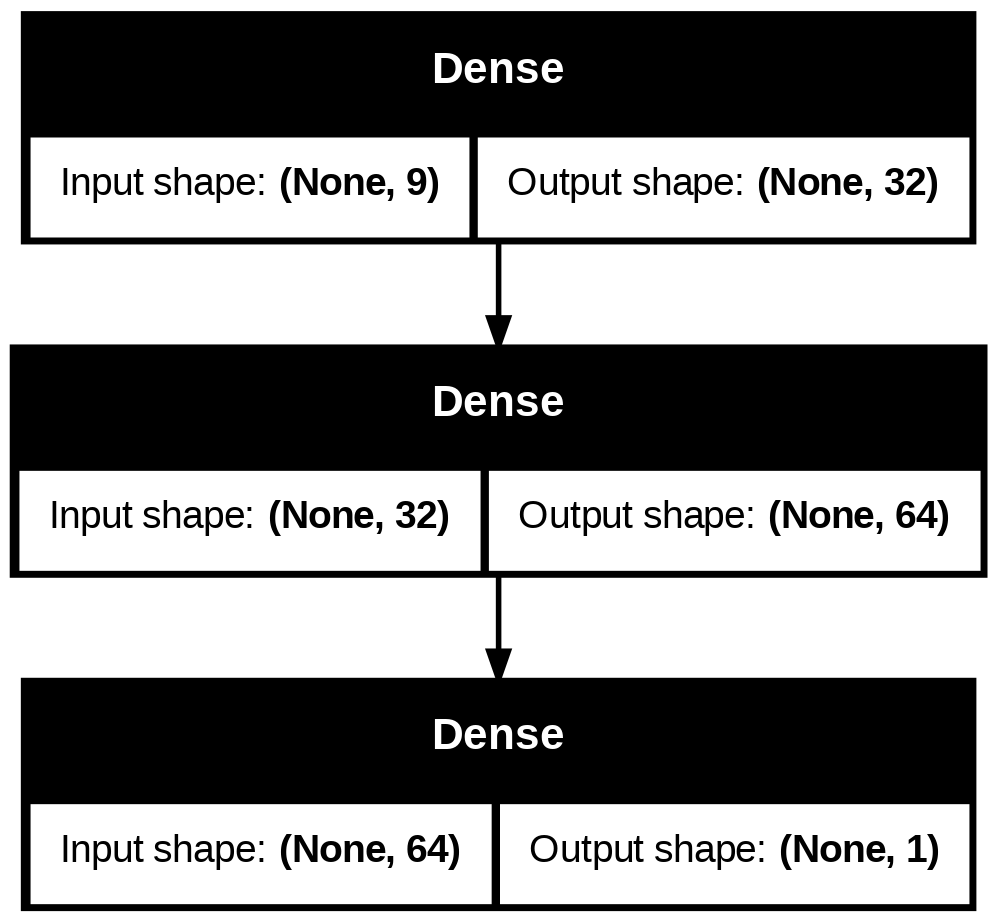

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='mse', optimizer=optimier, metrics=['mae', 'mse'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=200, batch_size=50, validation_split=0.1)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 36265032.0000 - mae: 4280.1479 - mse: 36265032.0000 - val_loss: 31652362.0000 - val_mae: 3695.3330 - val_mse: 31652362.0000
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35529632.0000 - mae: 4276.1353 - mse: 35529632.0000 - val_loss: 31558538.0000 - val_mae: 3681.9644 - val_mse: 31558538.0000
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35027528.0000 - mae: 4213.6899 - mse: 35027528.0000 - val_loss: 31395656.0000 - val_mae: 3685.5005 - val_mse: 31395656.0000
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34343248.0000 - mae: 4128.6050 - mse: 34343248.0000 - val_loss: 31302244.0000 - val_mae: 3670.7708 - val_mse: 31302244.0000
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35000024.0000 - mae: 4169.7988 - mse: 35000024.0000 - val_loss: 31250502.0000 - val_mae: 3662.4656 - val_mse: 31250502.0000
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35956048.0000 - mae: 4244

In [ ]:
y_pred = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
model.evaluate(x_train, y_train)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35764752.0000 - mae: 4196.1377 - mse: 35764752.0000


[35952840.0, 4229.4951171875, 35952840.0]

In [ ]:
history = pd.DataFrame(hist.history)
history['epoch'] = hist.epoch

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

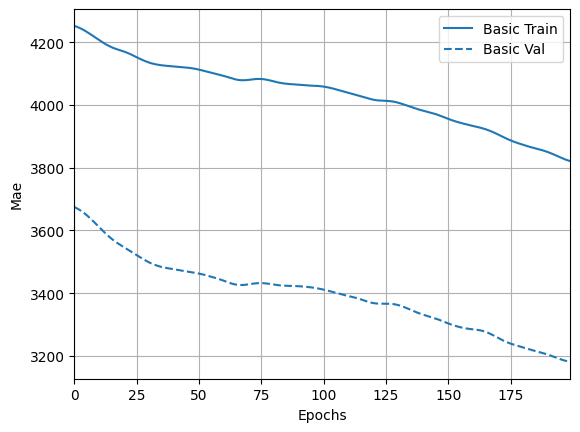

In [ ]:
plotter.plot({"basic":hist}, metric='mae')

In [ ]:
y_pred = y_pred.flatten()

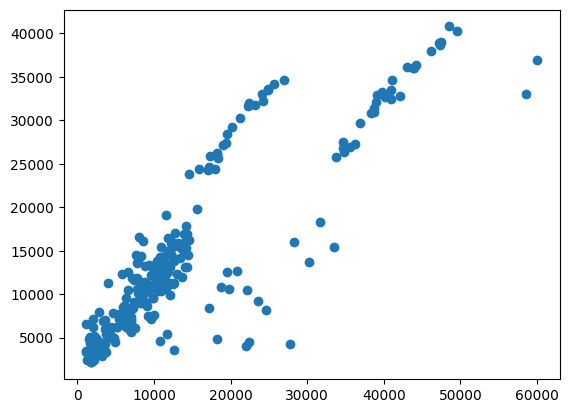

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
r2_score(y_test, y_pred)

0.7670439208040898

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(32, activation='elu', input_shape=(x_train.shape[1],)),
        layers.Dropout(0.2),
        layers.Dense(64, activation='elu'),
        layers.Dense(1)
    ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = keras.optimizers.Adam(0.001)

In [ ]:
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

In [ ]:
# stop early if parmaters remain same for 5 epochs

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=100, epochs=250, validation_split=0.2, callbacks=[early_stop, tfdocs.modeling.EpochDots()])

Epoch 1/250
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 24003264.0000 - mae: 3482.8381 - mse: 24003264.0000
Epoch: 0, loss:30566550.0000,  mae:3801.3733,  mse:30566550.0000,  val_loss:24304844.0000,  val_mae:3063.2451,  val_mse:24304844.0000,  
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 32041094.0000 - mae: 3856.3508 - mse: 32041094.0000 - val_loss: 24304844.0000 - val_mae: 3063.2451 - val_mse: 24304844.0000
Epoch 2/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32724706.0000 - mae: 3822.1458 - mse: 32724706.0000 - val_loss: 24294216.0000 - val_mae: 3057.9480 - val_mse: 24294216.0000
Epoch 3/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29831192.0000 - mae: 3781.0376 - mse: 29831192.0000 - val_loss: 24289582.0000 - val_mae: 3048.3127 - val_mse: 24289582.0000
Epoch 4/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30084196.0000 - mae: 3778.2969 - mse: 30084196.0000 - val_loss: 24268480.0000 - val_mae: 3020.2163 - val_mse: 24268480.0000
Epoch 5/250
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
# saves in hdf (h5) format. used is keras model is used across multiple NN frameowrks

In [ ]:
model.save_weights("model.weights.h5")

In [ ]:
# save weights, architecture, optimier all data using save method

In [ ]:
model.save("modelweights.keras")

In [ ]:
# load the model from the serialized model saved on disk

In [ ]:
loaded_model = keras.models.load_model("modelweights.keras")

In [ ]:
y_pred = loaded_model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
r2_score(y_test, y_pred)

0.8393577413049456